In [1]:
import os
import subprocess
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = './data/'
data_list = [data_path + s for s in os.listdir(data_path)]
data_list

['./data/data004',
 './data/data005',
 './data/data003',
 './data/data002',
 './data/data001']

In [3]:
raw_data = {'Cache_Size': [], 'FIFO': [],'LFU':[], 'LRU': [], 'TWO_Q': []}

cache_ratio = 10
data = data_list[2]

for cache_size in range(100, 2001, 100):
    cmd = subprocess.Popen('src/main ' + data + ' ' + "{}".format(cache_size) + ' ' + "{}".format(cache_ratio),
                           shell=True, stdout=subprocess.PIPE)

    temp = ""
    for line in cmd.stdout:
        temp += line.decode("utf-8")

    ratio = temp.split('\n')

    raw_data['Cache_Size'].append(cache_size)
    raw_data['FIFO'].append(float(ratio[1]))
    raw_data['LFU'].append(float(ratio[2]))
    raw_data['LRU'].append(float(ratio[3]))
    raw_data['TWO_Q'].append(float(ratio[4]))

In [4]:
# ratio 20
df_hitRatio = pd.DataFrame.from_dict(raw_data)
df_hitRatio = df_hitRatio.set_index('Cache_Size')
df_hitRatio

,FIFO,LFU,LRU,TWO_Q
Cache_Size,,,,
100,30.3,28.5,35.1,43.0
200,39.2,34.8,44.2,50.1
300,43.9,38.5,48.9,54.0
400,47.0,44.2,51.9,56.6
500,49.5,46.7,54.3,58.6
600,51.5,48.0,56.2,60.2
700,53.1,51.2,57.7,61.5
800,54.4,52.6,59.0,62.6
900,55.6,53.7,60.0,63.6


Text(0, 0.5, 'Hit ratio(%)')

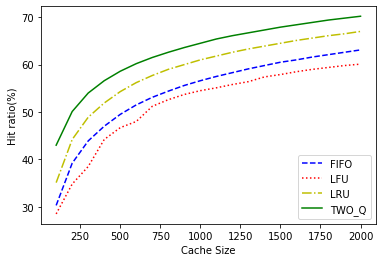

In [7]:
#data4
df_hitRatio.plot(style=['--',':','-.','-'],color=['b','r','y','g'])
plt.xlabel("Cache Size")
plt.ylabel("Hit ratio(%)")